## Example script for training the L2HMC sampler

## Imports / setup for training

In [1]:
%load_ext autoreload
%autoreload 2

import logging
import datetime
import os
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
try:
    import horovod
    import horovod.tensorflow as hvd
    try:
        RANK = hvd.rank()
    except ValueError:
        hvd.init()
        
    RANK = hvd.rank()
    HAS_HOROVOD = True
    logging.info(f'Using horovod version: {horovod.__version__}')
    logging.info(f'Using horovod from: {horovod.__file__}')
    GPUS = tf.config.experimental.list_physical_devices('GPU')
    for gpu in GPUS:
        tf.config.experimental.set_memory_growth(gpu, True)
    if GPUS:
        gpu = GPUS[hvd.local_rank()]
        tf.config.experimental.set_visible_devices(gpu, 'GPU')
except ImportError:
    HAS_HOROVOD = False

import tensorflow as tf
from rich.console import Console
from rich.theme import Theme
from rich import print

if os.path.abspath('..') not in sys.path:
    sys.path.append(os.path.abspath('..'))
    
sns.set_palette('bright')

plt.style.use('default')
sns.set_context('talk')
sns.set_style('whitegrid')
sns.set_palette('bright')

plt.rc('text', usetex=True)

console = Console(theme=Theme({"repr.number": "#ff79ff"}),
                  force_jupyter=True, 
                  width=300, log_time=True, log_time_format='[%X]')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load configs from `BIN_DIR/train_configs.json`:

In [3]:
import json
from config import BIN_DIR

train_configs_file = os.path.join(BIN_DIR, 'train_configs.json')
with open(train_configs_file, 'rt') as f:
    configs = json.load(f)
    
configs.update({
    'train_steps': 1000,
    'run_steps': 1000,
    'save_steps': 100,
    'logging_steps': 20,
    'print_steps': 10,
    'beta_init': 1.,
    'beta_final': 1.,
})

console.log(configs)

Get timestamp and create `log_dir` where everything will live

In [4]:
import utils.file_io as io
from utils.attr_dict import AttrDict

io.console = console

# Keep history of `log_dir` for later reference
log_file = os.path.join(os.getcwd(), 'log_dirs.txt')

configs = AttrDict(configs)

timestamps = AttrDict({
    'month': io.get_timestamp('%Y_%m'),
    'time': io.get_timestamp('%Y-%m-%d-%H%M%S'),
    'hour': io.get_timestamp('%Y-%m-%d-%H'),
    'minute': io.get_timestamp('%Y-%m-%d-%H%M'),
    'second': io.get_timestamp('%Y-%m-%d-%H%M%S'),
})

log_dir = io.make_log_dir(configs, 'GaugeModel', log_file,
                          timestamps=timestamps)
configs.log_dir = log_dir
io.write(f'{configs.log_dir}', log_file, 'a')

To demonstrate everything is working correctly, we only train for `configs.train_steps = 100` training steps.

In [7]:
from utils.training_utils import train 

# Only make plots for 8 chains to speed up plotting
num_chains_to_plot = 8

# Draw initial x uniformly from [-pi, pi]:
x_shape = configs.dynamics_config.get('x_shape', None)
x = tf.random.uniform(x_shape, minval=-np.pi, maxval=np.pi)
x = tf.reshape(x, (x.shape[0], -1))

x, dynamics, _, configs = train(configs,
                                x=x, make_plots=True,
                                num_chains=num_chains_to_plot,
                                should_track=False)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2311: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1399: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


In [9]:
from utils.inference_utils import run as run_inference

if configs.get('run_steps', None) > 0:
    log_dir = configs.log_dir
    beta = configs.get('beta_final', None)
    inference_results = run_inference(dynamics=dynamics,
                                      x=x,
                                      args=configs, 
                                      beta=beta,
                                      make_plots=True,
                                      therm_frac=0.2,
                                      num_chains=num_chains_to_plot,
                                      console=console,
                                      save_x=False)

/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/saforem2/opt/anaconda3/envs/tf2.4/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


![charge_chains]('/Users/saforem2/l2hmc-qcd/logs/GaugeModel_logs/test/2021_01/DEBUG_L16_b256_lf5_actswish_bi3_bf3_dp01_sepNets_NCProj-2021-01-26-1725/inference/L16_b256__lf5_eps01-2021-01-26-1745/plots/charge_chains.png')

In [9]:
png_dir = os.path.abspath('/Users/saforem2/l2hmc-qcd/logs/GaugeModel_logs/test/2021_01/DEBUG_L16_b256_lf5_actswish_bi3_bf3_dp01_sepNets_NCProj-2021-01-26-1725/inference/L16_b256__lf5_eps01-2021-01-26-1745/plots')
png_file = os.path.join(png_dir, 'charge_chains.png')
png_file

'/Users/saforem2/l2hmc-qcd/logs/GaugeModel_logs/test/2021_01/DEBUG_L16_b256_lf5_actswish_bi3_bf3_dp01_sepNets_NCProj-2021-01-26-1725/inference/L16_b256__lf5_eps01-2021-01-26-1745/plots/charge_chains.png'

![img]('/Users/saforem2/l2hmc-qcd/logs/GaugeModel_logs/test/2021_01/DEBUG_L16_b256_lf5_actswish_bi3_bf3_dp01_sepNets_NCProj-2021-01-26-1725/inference/L16_b256__lf5_eps01-2021-01-26-1745/plots/charge_chains.png')

TypeError: Image data of dtype <U201 cannot be converted to float

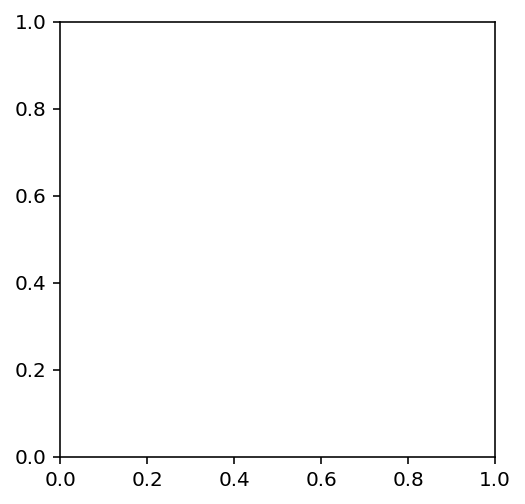

In [6]:
plt.imshow('/Users/saforem2/l2hmc-qcd/logs/GaugeModel_logs/test/2021_01/DEBUG_L16_b256_lf5_actswish_bi3_bf3_dp01_sepNets_NCProj-2021-01-26-1725/inference/L16_b256__lf5_eps01-2021-01-26-1745/plots/charge_chains.png')

In [ ]:
%

In [ ]:
%open /U

In [4]:
from IPython.display import IFrame

pdf_file = (os.path.abspath("/Users/saforem2/l2hmc-qcd/logs/GaugeModel_logs/test/2021_01/DEBUG_L16_b256_lf5_actswish_bi3_bf3_dp01_sepNets_NCProj-2021-01-26-1725/inference/L16_b256__lf5_eps01-2021-01-26-1745/plots/charge_chains.pdf"))
IFrame(pdf_file, width=600, height=300)
#L16_b256__lf5_eps01-2021-01-26-1745/plots/charge_chains.pdf", width=600, height=300)
#IFrame("./samples/simple3.pdf", width=600, height=300)